In [43]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [44]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/anterior/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/anterior/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [45]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
1,0.000000,115.24142,0.000,7.130074e-12,40.431974,0.000000,0,5,0.000000,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,0.538812,142.35385,1.530,1.667491e+01,5.765878,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.055,2.127697e+01,4.710831,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

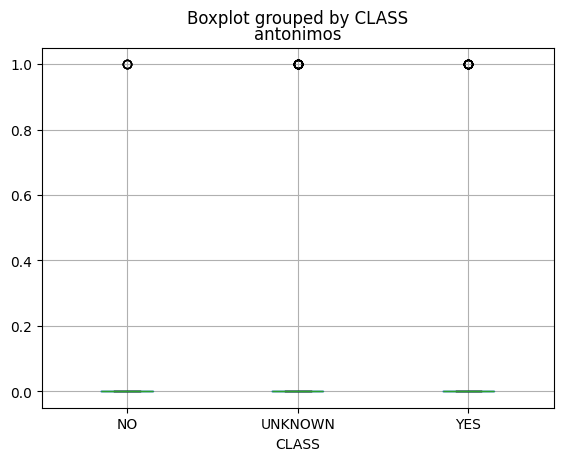

In [46]:
train.boxplot(by="CLASS",column=["antonimos"])

In [47]:
#train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
1,0.000000,115.24142,0.000,7.130074e-12,40.431974,0.000000,0,5,0.000000,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,0.538812,142.35385,1.530,1.667491e+01,5.765878,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.055,2.127697e+01,4.710831,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO


In [48]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [49]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [50]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

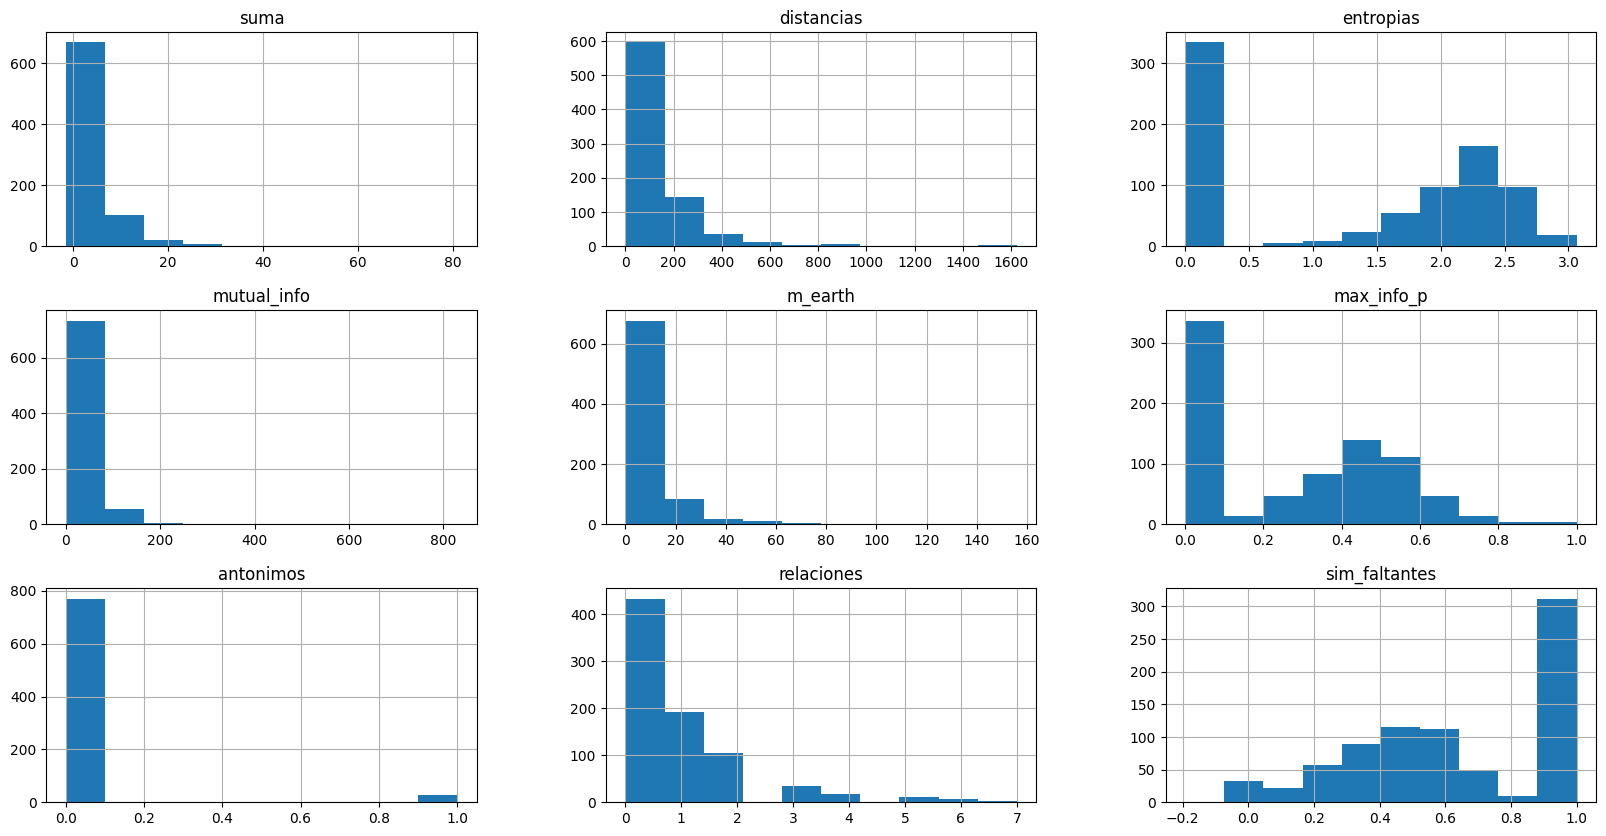

In [51]:
train.hist(figsize=(20,10))
plt.show()

In [52]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/anterior/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/anterior/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [53]:
#test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.798322,248.949950,1.473,2.678645e+01,55.539307,0.135764,0,3,0.105568,YES
1,2.702315,137.500780,2.149,2.876362e+01,5.662471,0.393066,0,0,0.338005,YES
2,0.000000,95.241104,0.000,1.413092e-12,24.614044,0.000000,0,0,0.000000,YES
3,0.000000,0.000000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,2.519199,84.603660,2.468,2.350911e+01,6.310785,0.412710,0,0,0.413161,NO
...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000,0.000000e+00,0.000000,0.000000,0,1,1.000000,YES
96,0.000000,0.000000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO
97,4.751945,104.496376,2.208,3.303158e+01,5.864232,0.467463,0,0,0.485553,UNKNOWN
98,1.125033,110.865036,1.549,1.389688e+01,4.866738,0.353093,0,0,0.234342,UNKNOWN


In [54]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [55]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [56]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [57]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [58]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [59]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [60]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
model.decision_function(X)

array([ 9.42772655e-01, -7.74620070e-01,  4.11373408e-01,  9.42772655e-01,
       -7.31255313e-02,  6.77073031e-01,  9.42772655e-01,  6.77073031e-01,
        2.10425617e-02, -1.34991218e+00,  6.77073031e-01,  9.42772655e-01,
        3.11224189e-01,  4.26124536e-01,  6.17673074e-01,  9.42772655e-01,
        4.11373408e-01,  2.78113648e-01,  7.21391116e-02,  2.42837114e-01,
       -1.32094647e-01,  6.77073031e-01,  6.77073031e-01,  6.77073031e-01,
       -7.17529008e-02,  4.11373408e-01,  6.77073031e-01, -1.33301344e-01,
        3.98876451e-02,  2.04101068e-01,  2.39170329e-01,  4.11373408e-01,
        2.57553842e-01,  2.64608181e-01,  6.77073031e-01,  6.77073031e-01,
        4.11373408e-01,  1.67167818e-01,  8.79603161e-02,  9.42772655e-01,
        9.42772655e-01,  9.64039850e-02, -1.24118802e-01,  3.12821693e-01,
        4.11373408e-01,  1.92600084e-01,  6.77073031e-01,  4.11373408e-01,
        9.42772655e-01,  6.77073031e-01, -3.46398853e-01,  3.47460018e-02,
       -6.08951080e-01,  

In [62]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'entropias', 'mutual_info', 'm_earth',
       'max_info_p', 'antonimos', 'relaciones', 'sim_faltantes'],
      dtype='object')

In [63]:
model.classes_

array([0, 1])

In [64]:
model.coef_[0]

array([ 0.02111167, -0.70148909,  0.08756085, -0.24061855,  0.19575391,
       -0.11405624, -0.04089127, -0.32838367,  0.1494546 ])

In [65]:
coeficientes=model.coef_[0]

In [66]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 m_earth 1 distancias


In [67]:
n_columns=train.shape[1]-1

In [68]:
n_columns

9

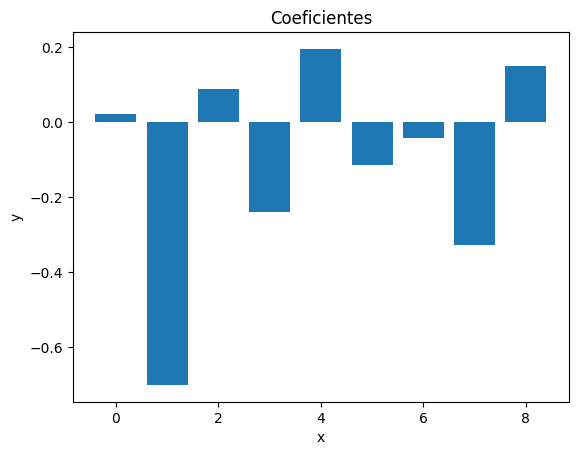

In [69]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [70]:
predictions = model.predict(X_test)

In [71]:
print(confusion_matrix(y_test, predictions))

[[208 182]
 [149 261]]


In [72]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.59
recall 0.64
f1_score:  0.61
matthews_score:  0.17


In [73]:
X_train.shape

(800, 9)

In [74]:
X_test.shape

(800, 9)

In [75]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [76]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [77]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.620000 (0.095059)


In [78]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.700000 (0.108186)


In [79]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.650000 (0.072263)


In [80]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.250000 (0.125715)


In [81]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [82]:
model = linear_model.LogisticRegression().fit(X_train,y_train)

In [83]:
explainer = shap.Explainer(model,X_train)
shap_values = explainer.shap_values(X_test)

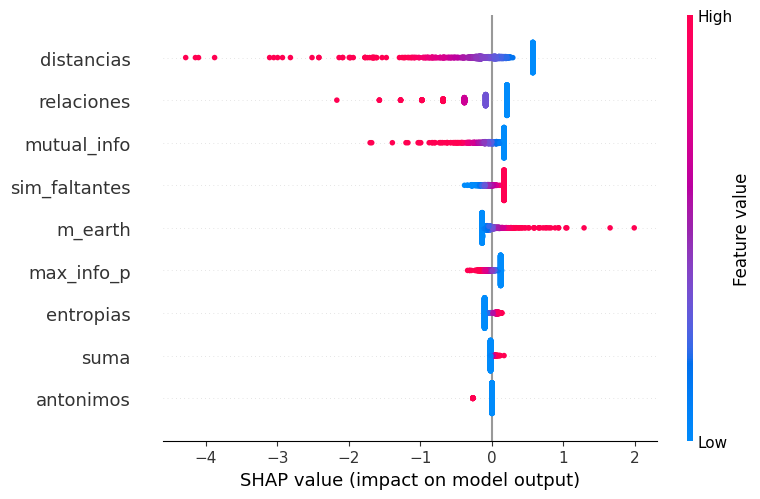

In [84]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])